# EasyVisa Project

## Context:

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

## Objective:

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired your firm EasyVisa for data-driven solutions. You as a data scientist have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status. 


## Data Description

The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No 
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment. 
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Importing necessary libraries and data

In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
#To install xgboost library use - !pip install xgboost 
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression


pd.set_option('display.max_columns', 999)

In [2]:
# import data and label as df
df = pd.read_csv('EasyVisa.csv')
# show first 10 rows of dataframe
df.head(10)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
5,EZYV06,Asia,Master's,Y,N,2339,2012,South,78252.1400,Year,Y,Certified
6,EZYV07,Asia,Bachelor's,N,N,4985,1994,South,53635.3900,Year,Y,Certified
7,EZYV08,North America,Bachelor's,Y,N,3035,1924,West,418.2298,Hour,Y,Denied
8,EZYV09,Asia,Bachelor's,N,N,4810,2012,Midwest,74362.1900,Year,Y,Certified
9,EZYV10,Europe,Doctorate,Y,N,2251,1995,South,67514.7600,Year,Y,Certified


In [3]:
# show 10 random rows of dataframe
df.sample(10)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
7578,EZYV7579,Asia,High School,N,N,3908,1987,Midwest,151117.7900,Year,Y,Denied
2485,EZYV2486,Asia,Bachelor's,Y,N,3183,1979,Midwest,56822.1300,Year,N,Certified
16213,EZYV16214,Asia,Bachelor's,Y,N,1046,2009,South,119543.2700,Year,Y,Denied
14786,EZYV14787,Asia,Master's,Y,Y,523,2014,West,104242.7800,Year,Y,Certified
20330,EZYV20331,Asia,Master's,Y,N,635,2007,South,42786.5200,Year,Y,Certified
15067,EZYV15068,Europe,Master's,Y,N,1699,1953,Northeast,24996.6600,Year,Y,Certified
12093,EZYV12094,Africa,Master's,Y,N,116,1963,West,85108.7800,Year,Y,Certified
3128,EZYV3129,Asia,Bachelor's,Y,N,1395,1977,South,287.2183,Hour,Y,Certified
9049,EZYV9050,Europe,Master's,N,N,3275,1995,Northeast,108556.0800,Year,Y,Certified
17203,EZYV17204,Asia,High School,Y,N,1543,2010,South,146864.6000,Year,N,Certified


##### Insight:
Just from the 20 rows we have seen here, there does not seem to be any missing value issues. There does seem to be a large bit of data preprocessing that needs to be accomplished, however. That will be taken care of after the initial EDA.

## Data Overview

- Observations
- Sanity checks

In [4]:
# check size of dataframe
df.shape

(25480, 12)

In [5]:
# check the variable types and for null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


##### Insight:
- There are 25480 rows of data here with 12 columns
- There seems to be no null values (does not mean no missing values)
- There are too many object type variables that will need to be fixed in data preprocessing

In [6]:
# check the numercial status of each numerical column and transpose it
df.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5667.043210,22877.928848,-26.0000,1022.00,2109.00,3504.0000,602069.00
yr_of_estab,25480.0,1979.409929,42.366929,1800.0000,1976.00,1997.00,2005.0000,2016.00
prevailing_wage,25480.0,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27


##### Insight:
- There seems to be some incorrect values in the number of employees with negative numbers (which is impossible)
- Number of Employees is very right skewed with a long tail
- Year of establishment is very left skewed with a long tail as well
- Prevailing wage can not have any observations done on it at this point as the variable differs in hourly/weekly/monthly/yearly in it's unit

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification? 

2. How does the visa status vary across different continents? 
 
3. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status? 
 
4. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa? 
 
5. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?

### Uni-variate Analysis

In [7]:
# lets first see what each possible value for each variable is
# we are intentionally leaving out a few variables from this part
# Case_ID is worthless to us at this point
# any of the pure numerical variables I am also not interested in at this point

# make a list of all interested columns
cols = ['continent','education_of_employee','has_job_experience','requires_job_training',
        'region_of_employment','unit_of_wage','full_time_position','case_status']

# loop list through for loop printing out all the values and their respective counts
# this is a good way to see if there are missing values that have been populated with a 0 or ? or #EMPTY, etc....
for col in cols:
    print(col)
    print('')
    print(df[col].value_counts())
    print('')


continent

Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: continent, dtype: int64

education_of_employee

Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: education_of_employee, dtype: int64

has_job_experience

Y    14802
N    10678
Name: has_job_experience, dtype: int64

requires_job_training

N    22525
Y     2955
Name: requires_job_training, dtype: int64

region_of_employment

Northeast    7195
South        7017
West         6586
Midwest      4307
Island        375
Name: region_of_employment, dtype: int64

unit_of_wage

Year     22962
Hour      2157
Week       272
Month       89
Name: unit_of_wage, dtype: int64

full_time_position

Y    22773
N     2707
Name: full_time_position, dtype: int64

case_status

Certified    17018
Denied        8462
Name: case_status, dtype: int64



##### Insights:
- Overall there seems to be no hidden missing values that have been populated with odd string values to indicate an empty entry

continent value counts and percentages

Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: continent, dtype: int64
Asia             66.17
Europe           14.65
North America    12.92
South America     3.34
Africa            2.16
Oceania           0.75
Name: continent, dtype: float64


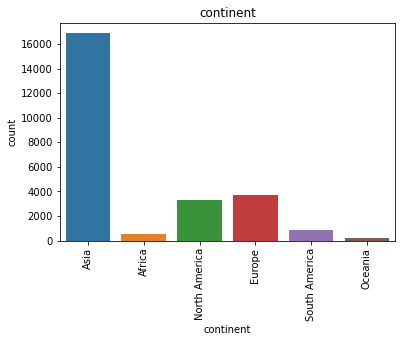

education_of_employee value counts and percentages

Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: education_of_employee, dtype: int64
Bachelor's     40.16
Master's       37.81
High School    13.42
Doctorate       8.60
Name: education_of_employee, dtype: float64


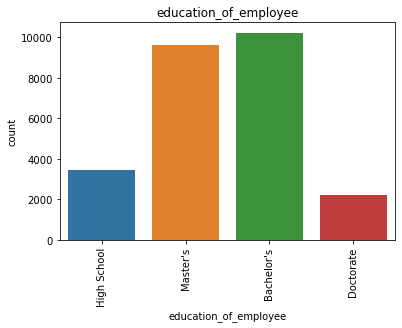

has_job_experience value counts and percentages

Y    14802
N    10678
Name: has_job_experience, dtype: int64
Y    58.09
N    41.91
Name: has_job_experience, dtype: float64


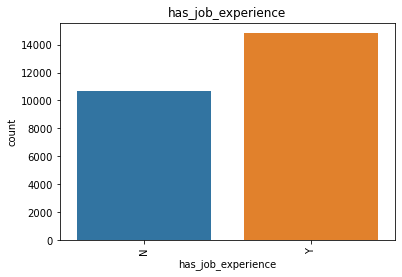

requires_job_training value counts and percentages

N    22525
Y     2955
Name: requires_job_training, dtype: int64
N    88.4
Y    11.6
Name: requires_job_training, dtype: float64


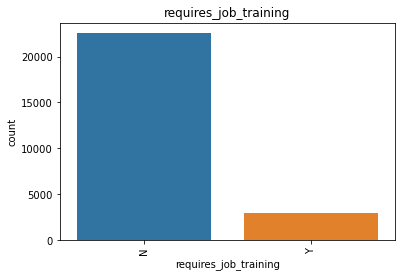

region_of_employment value counts and percentages

Northeast    7195
South        7017
West         6586
Midwest      4307
Island        375
Name: region_of_employment, dtype: int64
Northeast    28.24
South        27.54
West         25.85
Midwest      16.90
Island        1.47
Name: region_of_employment, dtype: float64


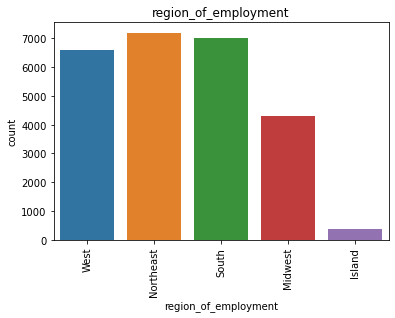

unit_of_wage value counts and percentages

Year     22962
Hour      2157
Week       272
Month       89
Name: unit_of_wage, dtype: int64
Year     90.12
Hour      8.47
Week      1.07
Month     0.35
Name: unit_of_wage, dtype: float64


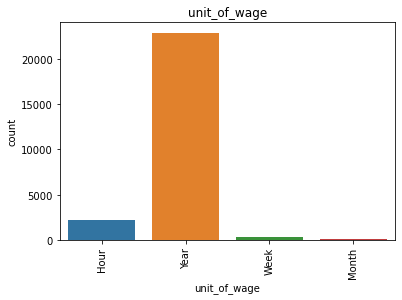

full_time_position value counts and percentages

Y    22773
N     2707
Name: full_time_position, dtype: int64
Y    89.38
N    10.62
Name: full_time_position, dtype: float64


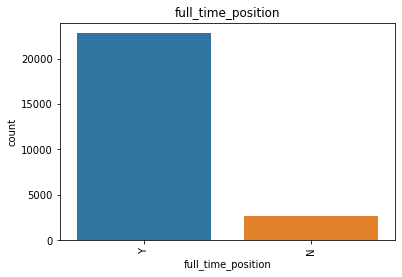

case_status value counts and percentages

Certified    17018
Denied        8462
Name: case_status, dtype: int64
Certified    66.79
Denied       33.21
Name: case_status, dtype: float64


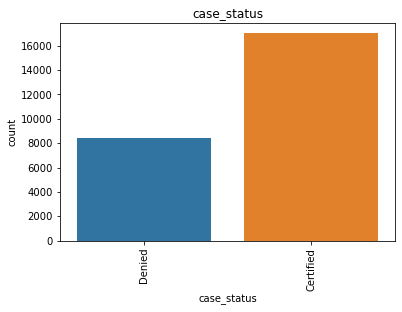

In [8]:
# lets see this same data visualized and contextualized with some percentages and bar charts
for colname in cols:
    # show value counts of each variable
    print('{} value counts and percentages'.format(colname))
    print('')
    print(df[colname].value_counts())
    print(round(df[colname].value_counts(normalize=True)*100,2)) # shows the percentage rounded to 2 decimal places
    # plot each variables
    sns.countplot(data = df, x = colname)
    plt.title('{}'.format(colname))
    plt.xticks(rotation=90) # rotate labals 90 degrees
    plt.show()

##### Insights:
- Continent: over 66% of applicants are from the Asian continent
- education_of_emplyee: Over 86% of applicants have a bachelor's degree from a college at the least
- has_job_experience: was a little surprised by this outcome. The outcome was closer to 50/50 than expected. Could mean there are a large number of freshly graduated from college applicants in this dataset
- requires_job_training: Most people do not required job training, even though almost 42% did not have any job experience. This could point back to the freshly graduated from college theory and these applicants are coming from highly specialized programs in their college studies.
- region_of_employment: Midwest has the smallest share of applicants (relative to the 4 major areas here, excluding island). This may show where the college trained foreign students are needed the most in the more populated areas on the country
- unit_of_wage: Most applicants gave their unit of wage in yearly format, which will make cleanup of the related columns easier in the data preprocessing steps
- full_time_position: almost 90% of applicants are applying for jobs that are full-time positions
- case_status: Almost 67% of applicants were certified in this dataset. This will be very important to keep in mind when evaluating the best metric to use to score our models on.

<AxesSubplot:xlabel='no_of_employees'>

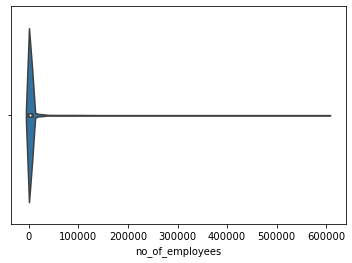

In [9]:
# lets now look at the remaining numerical variables by themselves to see how they are distributed
# again we wil not yet look at the pay information as the units are mixed and we cannot draw proper insight from them
sns.violinplot(data = df, x = 'no_of_employees')

##### Insight:
- There seems to be some extremely heavy skewing on the part of this data, we may have to look and see if a handful of outliers are causing this issue.

<AxesSubplot:xlabel='yr_of_estab'>

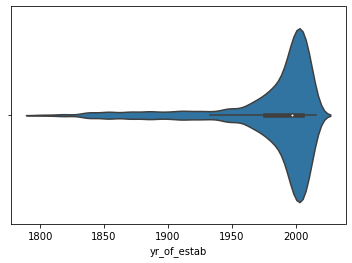

In [10]:
sns.violinplot(data=df, x = 'yr_of_estab')

##### Insights:
While there is some skewing in the data here as well, it is not nearly as bad as number of employees. There does not appear to be a few outliers just some older companies in the dataset

### Bi-Variate Analysis

<AxesSubplot:>

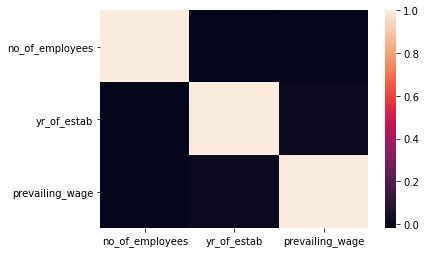

In [11]:
# A good place to start with bivariate analysis is a correlation heat map
visaCorr = df.corr()
sns.heatmap(visaCorr)

##### Insights:
- As seen above, in it's current state the data does not lend itself well to a bivariate_analysis, we can return to this type of study after some data-preprocessing
- Since this did not show very much, neither will a pairplot of all the columns. It will be too hard to read with the few usable continuous variables.

Insight #1


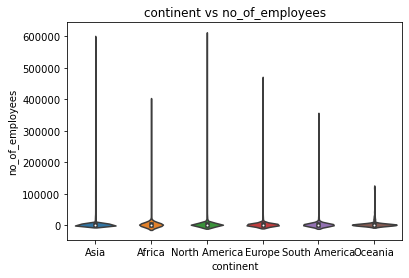

Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: continent, dtype: int64
Asia             66.17
Europe           14.65
North America    12.92
South America     3.34
Africa            2.16
Oceania           0.75
Name: continent, dtype: float64

Insight #2


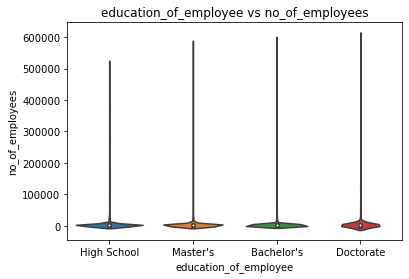

Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: education_of_employee, dtype: int64
Bachelor's     40.16
Master's       37.81
High School    13.42
Doctorate       8.60
Name: education_of_employee, dtype: float64

Insight #3


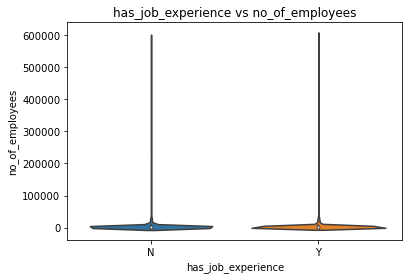

Y    14802
N    10678
Name: has_job_experience, dtype: int64
Y    58.09
N    41.91
Name: has_job_experience, dtype: float64

Insight #4


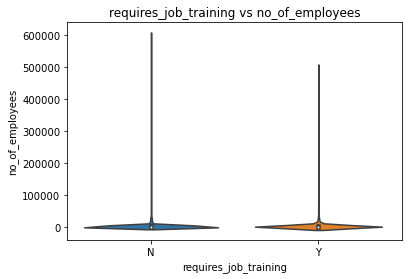

N    22525
Y     2955
Name: requires_job_training, dtype: int64
N    88.4
Y    11.6
Name: requires_job_training, dtype: float64

Insight #5


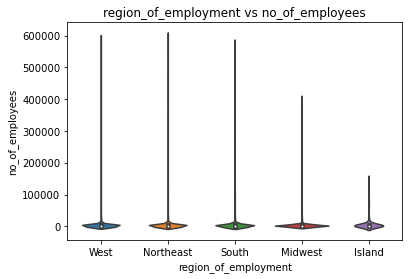

Northeast    7195
South        7017
West         6586
Midwest      4307
Island        375
Name: region_of_employment, dtype: int64
Northeast    28.24
South        27.54
West         25.85
Midwest      16.90
Island        1.47
Name: region_of_employment, dtype: float64

Insight #6


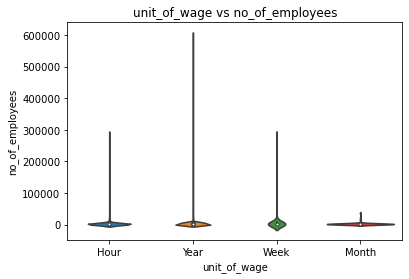

Year     22962
Hour      2157
Week       272
Month       89
Name: unit_of_wage, dtype: int64
Year     90.12
Hour      8.47
Week      1.07
Month     0.35
Name: unit_of_wage, dtype: float64

Insight #7


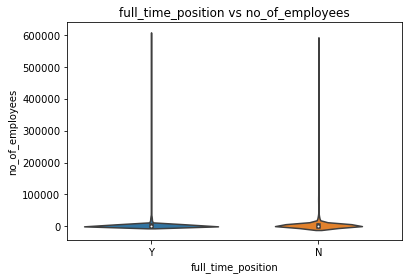

Y    22773
N     2707
Name: full_time_position, dtype: int64
Y    89.38
N    10.62
Name: full_time_position, dtype: float64

Insight #8


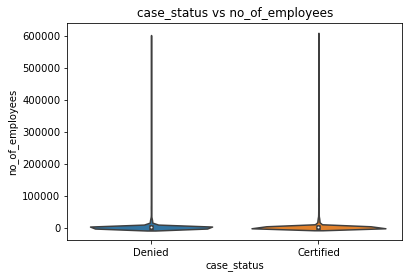

Certified    17018
Denied        8462
Name: case_status, dtype: int64
Certified    66.79
Denied       33.21
Name: case_status, dtype: float64

Insight #9


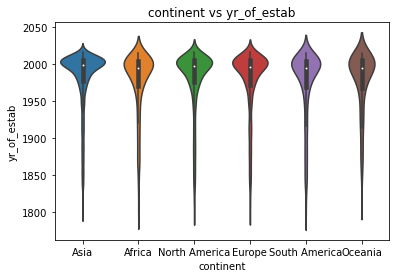

Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: continent, dtype: int64
Asia             66.17
Europe           14.65
North America    12.92
South America     3.34
Africa            2.16
Oceania           0.75
Name: continent, dtype: float64

Insight #10


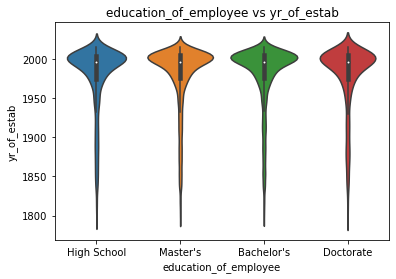

Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: education_of_employee, dtype: int64
Bachelor's     40.16
Master's       37.81
High School    13.42
Doctorate       8.60
Name: education_of_employee, dtype: float64

Insight #11


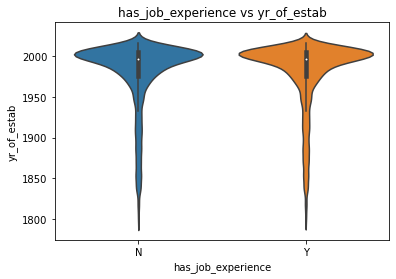

Y    14802
N    10678
Name: has_job_experience, dtype: int64
Y    58.09
N    41.91
Name: has_job_experience, dtype: float64

Insight #12


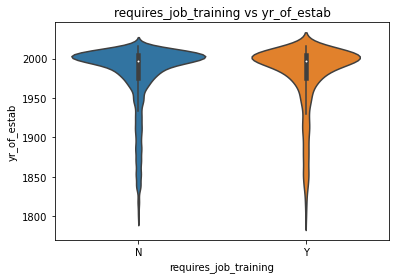

N    22525
Y     2955
Name: requires_job_training, dtype: int64
N    88.4
Y    11.6
Name: requires_job_training, dtype: float64

Insight #13


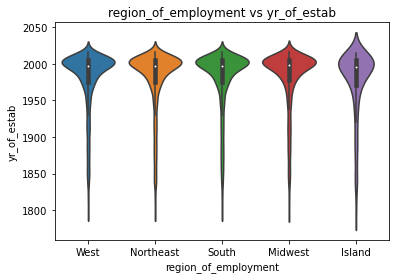

Northeast    7195
South        7017
West         6586
Midwest      4307
Island        375
Name: region_of_employment, dtype: int64
Northeast    28.24
South        27.54
West         25.85
Midwest      16.90
Island        1.47
Name: region_of_employment, dtype: float64

Insight #14


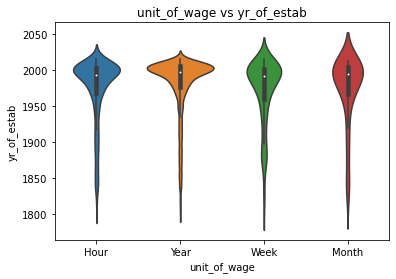

Year     22962
Hour      2157
Week       272
Month       89
Name: unit_of_wage, dtype: int64
Year     90.12
Hour      8.47
Week      1.07
Month     0.35
Name: unit_of_wage, dtype: float64

Insight #15


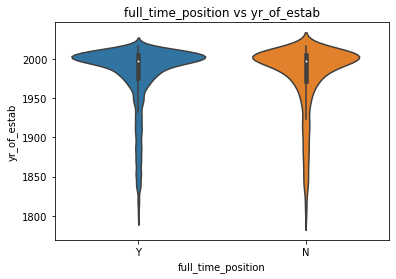

Y    22773
N     2707
Name: full_time_position, dtype: int64
Y    89.38
N    10.62
Name: full_time_position, dtype: float64

Insight #16


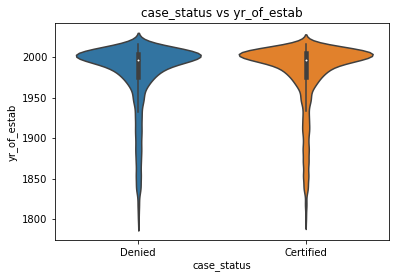

Certified    17018
Denied        8462
Name: case_status, dtype: int64
Certified    66.79
Denied       33.21
Name: case_status, dtype: float64



In [12]:
# lets build a for loop similar to the univariate analysis that cycles through two sets of columns for bivariate analysis
cols2 = ['no_of_employees','yr_of_estab']

insight_counter = 1 # will help making comments easier, rather than listing out each variable vs variable matchup
for colname2 in cols2:
    for colname in cols:
        print('Insight #{}'.format(insight_counter))
        plt.title('{} vs {}'.format(colname, colname2))
        sns.violinplot(data = df, x = colname, y = colname2)
        plt.show()
        print(df[colname].value_counts()) # will give more context to graph
        print(round(df[colname].value_counts(normalize=True)*100,2)) # shows the percentage rounded to 2 decimal places
        print('')
        insight_counter = insight_counter + 1

##### Insights:
1) No matter the employee region, the no_of_employees is still heavily skewed

2) Same as above for education level

3) Same as above for job experience

4) same as above for requiring job training

5) same as above for region of employment

6) Same as above for unit of wage

7) Same as above for full time position

8) Same as above for case status

9) Year of establishment is equally distributed across all regions of employee origin

10) Same as above for education of employee

11) Same as above for job experience

12) same as above for requiring job training
 
13) same as above for region of employment

14) Same as above for unit of wage

15) Same as above for full time position

16) Same as above for case status

- Overall even though there weren't that many thrilling insights, the data did show some good random distribution across all evaulated fields, which is a good sign on it's own. 

- We will now skip some of the portions of the EDA (for now) and come back to them later in favor of doing some data preprocessing in order to have some better EDA a second time around.

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering 
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

- So far here are the problmes that we need to address
    - continent needs to be redefined into a number system (one hot encoded since no prevailing order is clear) X
    - education of employee needs to be redefined into a number system X
    - job experience needs to become a binary X
    - job training needs to become a binary X
    - region of employment needs to be redefined into a number system (one hot encoded since no prevailing order is clear) X
    - prevailing wage needs to be dropped since the units are not uniform. Unit of wage can be kept and transformed into a numerical system X
    - full time position needs to become a binary X
    - case status needs to become a binary X
    - no_of_employees needs some outlier detection X

In [13]:
# we are going to make a dictionary with key variables and their transformed values
# this dictionary is for variables that have clear order of importance 
replacecols = {
    "education_of_employee": {'High School': 1, "Bachelor's": 2, "Master's": 3, "Doctorate": 4},
    "has_job_experience": {"Y": 1, "N": 0},
    "requires_job_training": {"Y": 1, "N": 0},
    "unit_of_wage": {"Hour": 1, "Week": 2, "Month": 3, "Year": 4},
    "full_time_position": {"Y": 1,"N": 0},
    "case_status": {"Certified": 1, "Denied": 0}
}

In [14]:
# now lets do a list of the cols we want to one-hot encode
onehotcols = ['continent', 'region_of_employment']

In [15]:
# let's now enact the replacecols and onehotcols 
df = df.replace(replacecols)
df = pd.get_dummies(df, columns = onehotcols)
df.sample(10)

,case_id,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,prevailing_wage,unit_of_wage,full_time_position,case_status,continent_Africa,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America,region_of_employment_Island,region_of_employment_Midwest,region_of_employment_Northeast,region_of_employment_South,region_of_employment_West
17160,EZYV17161,2,0,1,1939,1980,194545.7200,4,1,0,0,1,0,0,0,0,0,0,0,1,0
25131,EZYV25132,3,1,0,1302,1952,37507.7500,4,1,1,0,1,0,0,0,0,0,0,0,1,0
10241,EZYV10242,2,0,0,17647,1984,96.6666,1,1,0,0,0,1,0,0,0,0,0,1,0,0
25342,EZYV25343,1,1,0,736,2010,181607.5000,4,1,0,0,1,0,0,0,0,0,0,0,1,0
24008,EZYV24009,2,1,0,1927,2000,123480.0700,4,1,0,0,1,0,0,0,0,0,0,1,0,0
3852,EZYV3853,2,1,0,1148,2003,37999.8900,4,1,1,0,0,0,1,0,0,0,0,1,0,0
19884,EZYV19885,3,1,0,933,1920,2781.0600,4,1,1,0,0,1,0,0,0,0,0,0,1,0
2177,EZYV2178,4,0,0,5709,2005,57874.1300,4,1,1,0,1,0,0,0,0,0,0,0,1,0
20926,EZYV20927,3,1,0,2018,1987,68465.7600,4,1,0,0,1,0,0,0,0,0,0,0,0,1
3878,EZYV3879,2,0,0,3016,1993,53.5350,1,1,0,0,1,0,0,0,0,0,0,1,0,0


##### Insights:
We have successfully gotten rid of most of the data type issues with this first change. You can see the columns were generated with extra 0 or 1 values for the region of employment and continent of employee

In [16]:
# lets now drop case_ID and prevailing wage as they are not needed and cannot be used for the analysis
df = df.drop(['case_id','prevailing_wage'], axis=1)

In [17]:
# let's see how the data looks now
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   education_of_employee           25480 non-null  int64
 1   has_job_experience              25480 non-null  int64
 2   requires_job_training           25480 non-null  int64
 3   no_of_employees                 25480 non-null  int64
 4   yr_of_estab                     25480 non-null  int64
 5   unit_of_wage                    25480 non-null  int64
 6   full_time_position              25480 non-null  int64
 7   case_status                     25480 non-null  int64
 8   continent_Africa                25480 non-null  uint8
 9   continent_Asia                  25480 non-null  uint8
 10  continent_Europe                25480 non-null  uint8
 11  continent_North America         25480 non-null  uint8
 12  continent_Oceania               25480 non-null  uint8
 13  c

##### Insights:
We are down to 18 columns and all of the column types are now in proper datatype for our models. We are not left with any categorical columns. Let's now look at the possible outliers in the no_of_employees column

<AxesSubplot:xlabel='no_of_employees'>

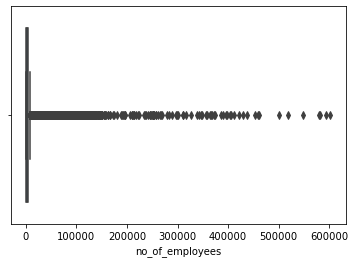

In [18]:
# let us use a box and whsiker to see what the potential outliers look like
sns.boxplot(data = df, x = 'no_of_employees')

##### Insights:
There seems to be quite a few outliers in this data. We may have to scale the data in order to use this column

<AxesSubplot:xlabel='no_of_employees', ylabel='Count'>

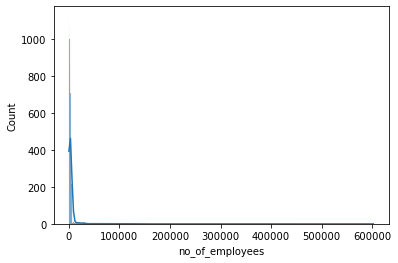

In [19]:
# lets look at a histogram of the data
sns.histplot(data = df, x = 'no_of_employees', kde=True)

##### Insights:
This column needs to be transformed to have a more normal distribution.

In [20]:
# using numpy's log transformer to transform the column into a log based scale
df['no_of_employees'] = np.log(df['no_of_employees'])

<AxesSubplot:xlabel='no_of_employees', ylabel='Count'>

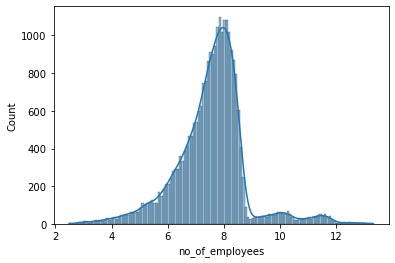

In [21]:
# let's now look at the distribution
sns.histplot(data = df, x = 'no_of_employees', kde=True)

##### Insights:
This is much closer to normal distribution and I am satisfied with how this turned out and will not transform it anymore

In [22]:
# need to erase any possible NaN values after this transformation
# this problem arose when model building started
med = df['no_of_employees'].median()
df['no_of_employees'].fillna(med, inplace=True)

## EDA

- Let's once again explore the bi-variate analysis with the completed data transformations. We can now gain better insight now that the data is easier to handle

<AxesSubplot:>

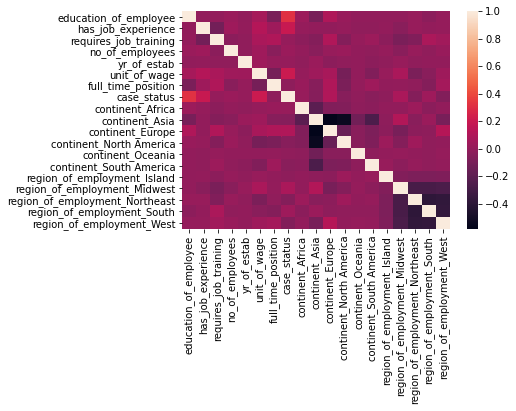

In [23]:
# A good place to start with bivariate analysis is a correlation heat map (again)
visaCorr2 = df.corr()
sns.heatmap(visaCorr2)

##### Insights:
There is not much to derive right away from this heat map. 
- There is some negative correlation among onehot encoded columns that derived from the same column
- Case_status and education of employee seem to have a more positive corraltion that other pairings
- Same could be said for Case status and unit of wage
- There is some sort of positive correlation between a western employment region and the continent of europe for the employee

We only need to re-do the bivariate analysis of the charts associated with no_of_employees after the transformations we did.

In [24]:
# let's append the new column names to the original cols and then re-rerun our bivariate loop for quick assesment of the data
added_cols = ['continent_Africa','continent_Asia','continent_Europe','continent_North America','continent_Oceania',
            'continent_South America','region_of_employment_Island','region_of_employment_Midwest',
            'region_of_employment_Northeast','region_of_employment_South','region_of_employment_West']
cols.extend(added_cols)

In [25]:
# We need to drop continent and region of employment from the original list
cols.remove('continent')
cols.remove('region_of_employment')

In [26]:
print(cols)

['education_of_employee', 'has_job_experience', 'requires_job_training', 'unit_of_wage', 'full_time_position', 'case_status', 'continent_Africa', 'continent_Asia', 'continent_Europe', 'continent_North America', 'continent_Oceania', 'continent_South America', 'region_of_employment_Island', 'region_of_employment_Midwest', 'region_of_employment_Northeast', 'region_of_employment_South', 'region_of_employment_West']


Insight #1


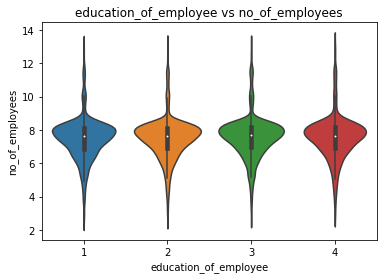

2    10234
3     9634
1     3420
4     2192
Name: education_of_employee, dtype: int64
2    40.16
3    37.81
1    13.42
4     8.60
Name: education_of_employee, dtype: float64

Insight #2


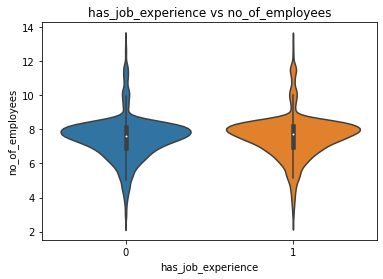

1    14802
0    10678
Name: has_job_experience, dtype: int64
1    58.09
0    41.91
Name: has_job_experience, dtype: float64

Insight #3


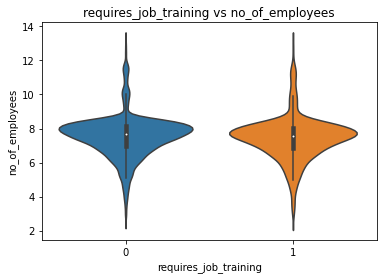

0    22525
1     2955
Name: requires_job_training, dtype: int64
0    88.4
1    11.6
Name: requires_job_training, dtype: float64

Insight #4


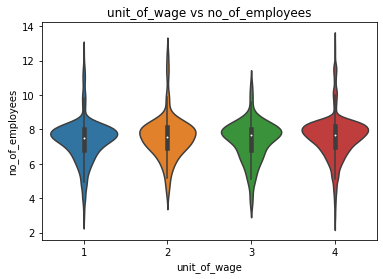

4    22962
1     2157
2      272
3       89
Name: unit_of_wage, dtype: int64
4    90.12
1     8.47
2     1.07
3     0.35
Name: unit_of_wage, dtype: float64

Insight #5


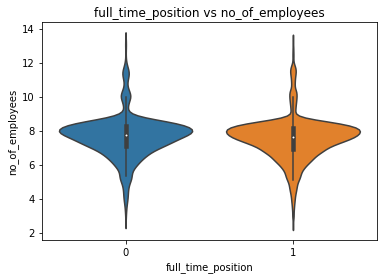

1    22773
0     2707
Name: full_time_position, dtype: int64
1    89.38
0    10.62
Name: full_time_position, dtype: float64

Insight #6


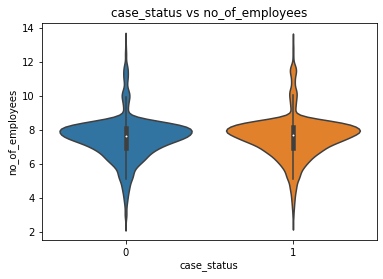

1    17018
0     8462
Name: case_status, dtype: int64
1    66.79
0    33.21
Name: case_status, dtype: float64

Insight #7


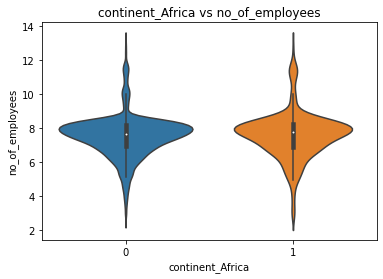

0    24929
1      551
Name: continent_Africa, dtype: int64
0    97.84
1     2.16
Name: continent_Africa, dtype: float64

Insight #8


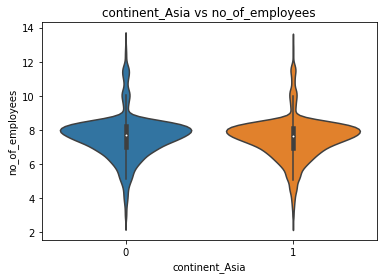

1    16861
0     8619
Name: continent_Asia, dtype: int64
1    66.17
0    33.83
Name: continent_Asia, dtype: float64

Insight #9


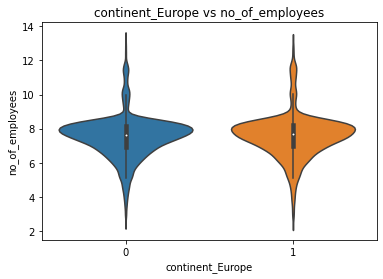

0    21748
1     3732
Name: continent_Europe, dtype: int64
0    85.35
1    14.65
Name: continent_Europe, dtype: float64

Insight #10


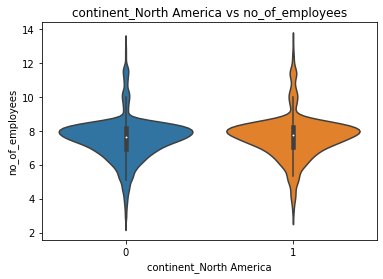

0    22188
1     3292
Name: continent_North America, dtype: int64
0    87.08
1    12.92
Name: continent_North America, dtype: float64

Insight #11


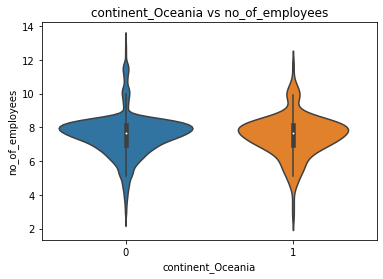

0    25288
1      192
Name: continent_Oceania, dtype: int64
0    99.25
1     0.75
Name: continent_Oceania, dtype: float64

Insight #12


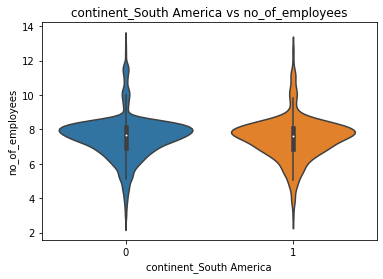

0    24628
1      852
Name: continent_South America, dtype: int64
0    96.66
1     3.34
Name: continent_South America, dtype: float64

Insight #13


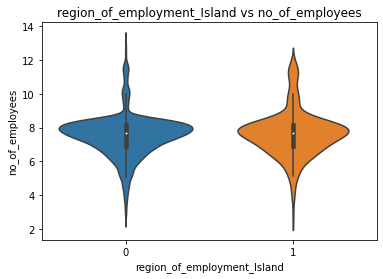

0    25105
1      375
Name: region_of_employment_Island, dtype: int64
0    98.53
1     1.47
Name: region_of_employment_Island, dtype: float64

Insight #14


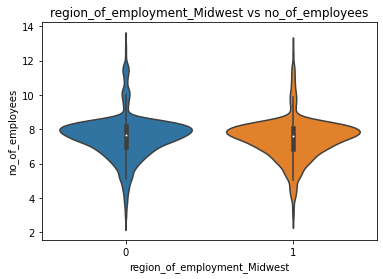

0    21173
1     4307
Name: region_of_employment_Midwest, dtype: int64
0    83.1
1    16.9
Name: region_of_employment_Midwest, dtype: float64

Insight #15


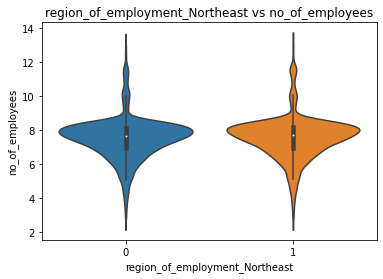

0    18285
1     7195
Name: region_of_employment_Northeast, dtype: int64
0    71.76
1    28.24
Name: region_of_employment_Northeast, dtype: float64

Insight #16


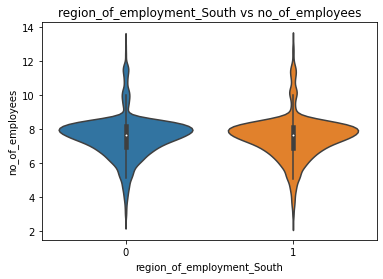

0    18463
1     7017
Name: region_of_employment_South, dtype: int64
0    72.46
1    27.54
Name: region_of_employment_South, dtype: float64

Insight #17


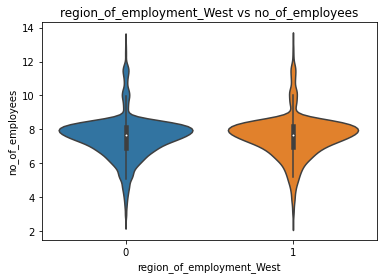

0    18894
1     6586
Name: region_of_employment_West, dtype: int64
0    74.15
1    25.85
Name: region_of_employment_West, dtype: float64



In [27]:
# rerun the embedded for loop process to get the charts
insight_counter = 1 # will help making comments easier, rather than listing out each variable vs variable matchup
for colname in cols:
    print('Insight #{}'.format(insight_counter))
    plt.title('{} vs {}'.format(colname, 'no_of_employees'))
    sns.violinplot(data = df, x = colname, y = 'no_of_employees')
    plt.show()
    print(df[colname].value_counts()) # will give more context to graph
    print(round(df[colname].value_counts(normalize=True)*100,2)) # shows the percentage rounded to 2 decimal places
    print('')
    insight_counter = insight_counter + 1

##### Insights:
It could be a side effect of the log scaling of the no_of_employees, but every variable and their respective values within the variables have very normal and similar distributions. 

## Building bagging and boosting models

- We will first take care of some house-keeping items such as set up and building some user defined functions to make evaluating the results of the model easier.

In [28]:
# divide the dataframe into the independent variables (x), and the dependent varaible (y - case_status)
x = df.drop('case_status', axis = 1)
# x = x.drop('no_of_employees', axis = 1)
y = df.pop('case_status')

In [29]:
# splitting the data in 70% training and 30% test with an emphasis on good randimization on the y variable using stratify
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.30, random_state=1,stratify=y)

In [75]:
## Function to create confusion matrix to visualize the results
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(x_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [31]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    #Predicting on train and tests
    pred_train = model.predict(x_train)
    pred_test = model.predict(x_test)
    
    #Accuracy of the model
    train_acc = model.score(x_train,y_train)
    test_acc = model.score(x_test,y_test)
    
    #Recall of the model
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    
    #Precision of the model
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(x_train,y_train))
        print("Accuracy on test set : ",model.score(x_test,y_test))
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))
    
    return score_list # returning the list with train and test scores

### Decision Tree Classifier
- The base of many of these models is a decision tree so lets start with a singular decision tree

In [63]:
# Define a new model
DecisionTree = DecisionTreeClassifier(random_state=1)

In [64]:
# Fit model on training Data
DecisionTree.fit(x_train,y_train)

DecisionTreeClassifier(random_state=1)

In [66]:
# Lets look at the scores of the Decision tree
Decision_Tree_Score = get_metrics_score(DecisionTree)

Accuracy on training set :  0.999887867234806
Accuracy on test set :  0.6594714809000524
Recall on training set :  0.9998321161756065
Recall on test set :  0.7408423114593535
Precision on training set :  1.0
Precision on test set :  0.7471355195574871


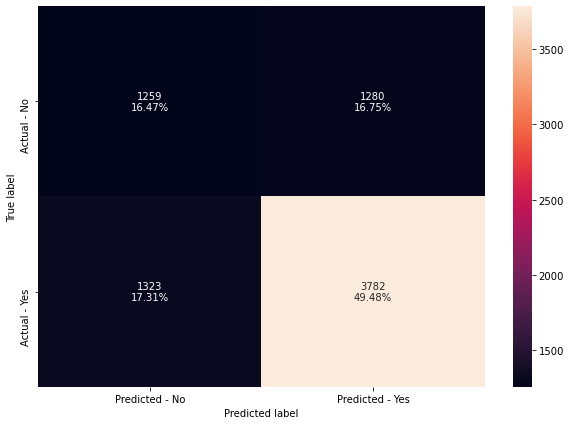

In [68]:
# Visualize the scores
make_confusion_matrix(DecisionTree, y_test)

##### Insights: 
As expected with a singular decision tree, massive overfitting on the training data. With no inputs, the decision tree will go to maximum depths to perfectly fit the model on the training data.

### Bagging Classifier

In [32]:
# base_estimator for bagging classifier is a decision tree by default
bagging_estimator=BaggingClassifier(random_state=1)
bagging_estimator.fit(x_train,y_train) # fit the model on our training data

BaggingClassifier(random_state=1)

In [33]:
# lets use our defined functions above to quickly score and give visual to how we performed
bagging_estimator_score = get_metrics_score(bagging_estimator)

Accuracy on training set :  0.9823951558645436
Accuracy on test set :  0.6911302982731554
Recall on training set :  0.9828758499118609
Recall on test set :  0.7649363369245837
Precision on training set :  0.9906929520263982
Precision on test set :  0.7708251085669167


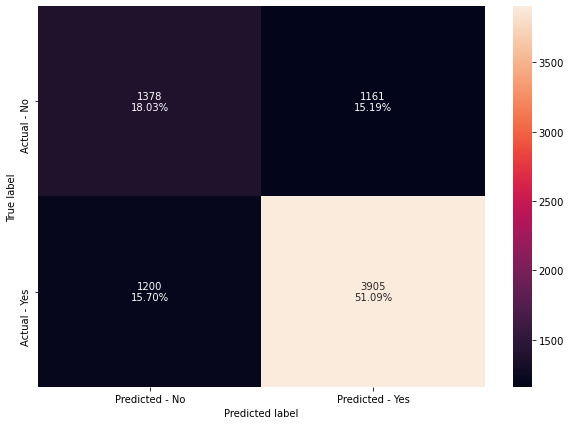

In [34]:
make_confusion_matrix(bagging_estimator, y_test)

##### Insights 
- Looking at this first run of the bagging model, it did not perform so bad. The testing score were higher than expected but the training scores clearly show some over-fitting on the decision tree model. We can use hyper-parameter tuning later to try and see if we can optimize the performance to be more robust

### Random Forest Classifier


In [35]:
# time to try out the random forest model
rf_estimator = RandomForestClassifier(random_state = 1)
rf_estimator.fit(x_train, y_train)# fit the model on our training data

RandomForestClassifier(random_state=1)

In [36]:
# lets see how the model performed
rf_estimator_score = get_metrics_score(rf_estimator)

Accuracy on training set :  0.999831800852209
Accuracy on test set :  0.6989795918367347
Recall on training set :  0.9999160580878033
Recall on test set :  0.8035259549461312
Precision on training set :  0.9998321302669129
Precision on test set :  0.7596296296296297


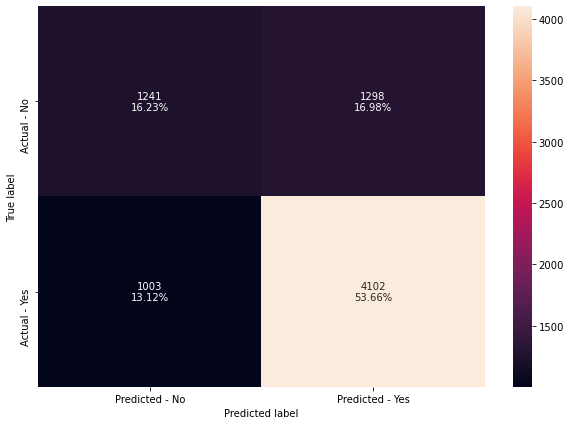

In [37]:
make_confusion_matrix(rf_estimator, y_test)

##### Insights:
Again, like the bagging model, we see generally good performance on the key indicating scores but we do have over-fitting still on the training data.


### AdaBoosting 


In [38]:
# lets now build the base model for adaptive boosting
abc = AdaBoostClassifier(random_state = 1)
abc.fit(x_train,y_train)

AdaBoostClassifier(random_state=1)

In [39]:
# let's see how the model performed
abc_score = get_metrics_score(abc)

Accuracy on training set :  0.7371607983852881
Accuracy on test set :  0.7345630559916274
Recall on training set :  0.8875178376563418
Recall on test set :  0.8871694417238002
Precision on training set :  0.75950003591696
Precision on test set :  0.7571046472751588


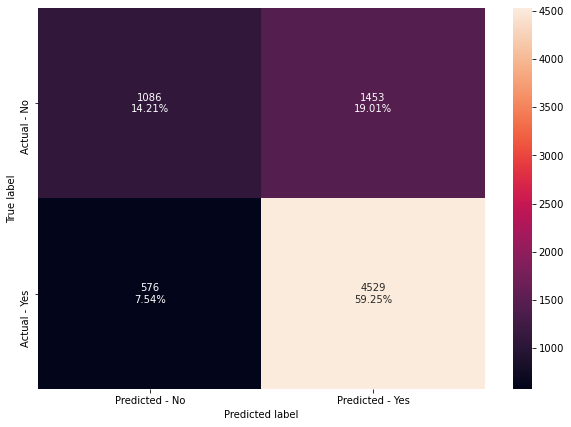

In [40]:
make_confusion_matrix(abc, y_test)

##### Insights:
There is much less overfitting going on in this model than the bagging/random forest. Training and testing score are very close relative to one another. The score themselves are encouraging for a starting place.

### Gradient Boosting

In [41]:
# lets now build the base model for gradient boosting
gbc = GradientBoostingClassifier(random_state = 1)
gbc.fit(x_train,y_train)

GradientBoostingClassifier(random_state=1)

In [42]:
# lets see how the base model performed
gbc_score = get_metrics_score(gbc)

Accuracy on training set :  0.7566158331464454
Accuracy on test set :  0.7450287807430664
Recall on training set :  0.8808024846806011
Recall on test set :  0.8763956904995103
Precision on training set :  0.782242433278664
Precision on test set :  0.7724447513812155


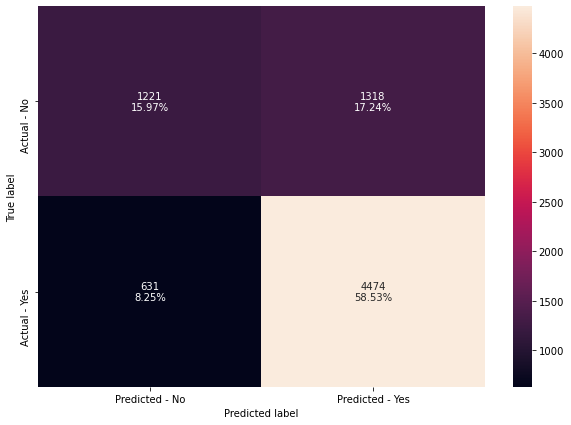

In [43]:
make_confusion_matrix(gbc, y_test)

##### Insights:
Like the adaboosting model, this model has performed well in it's initial run without any tuning. This is an encouraging sign for future tuning

- Thus far we have built 4 different types of models. We are scoring the models on a few different scores but the most important score based on our mission with the data is the Recall score. How many times can we correctly predict a case_status of 1 (which stands for certified). Since we are trying to build a profile of candidates that get certified we need to be able to correctly predict when a case will get certified and minimize incorrect classification here.
- If we were to say that all cases in the database were certified, we would have a recall rate of 66.79%, which is the percentage of certified cases in the data. We need to be well above this percentage in order to feel our models are functioning well. Currently, all of our models seem to be functioning well above this level, even before parameter tuning.

##  Will tuning the hyperparameters improve the model performance?
- We will now begin tuning all 5 of our models to see how we can improve our performance on each of them

### Tuning: Decision Tree

In [69]:
# Define new model
DecisionTree_tuned = DecisionTreeClassifier(random_state=1)

In [71]:
# make a grid of parameters to tune on
parameters = {'max_depth': np.arange(1,10), 
              'min_samples_leaf': [25, 50, 75, 100, 150, 200],
              'max_leaf_nodes' : [2, 3, 5, 10],
              'min_impurity_decrease': [0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score) # discussed earlier why recall is the best metric to use

# Run the grid search of the parameters
grid_obj = GridSearchCV(DecisionTree_tuned, parameters, scoring = acc_scorer, cv=5)

# fit search grid and bagging estimator on training data
grid_obj = grid_obj.fit(x_train, y_train)

# set the classifier to the best combo of parameters found in grid search
DecisionTree_tuned = grid_obj.best_estimator_

# Fit the model with the best parameters to the data
DecisionTree_tuned.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=1, max_leaf_nodes=2, min_impurity_decrease=0.1,
                       min_samples_leaf=25, random_state=1)

In [72]:
# lets see how the tuned model performed
DecisionTree_tuned_score = get_metrics_score(DecisionTree_tuned)

Accuracy on training set :  0.6679188158779995
Accuracy on test set :  0.6678440607012036
Recall on training set :  1.0
Recall on test set :  1.0
Precision on training set :  0.6679188158779995
Precision on test set :  0.6678440607012036


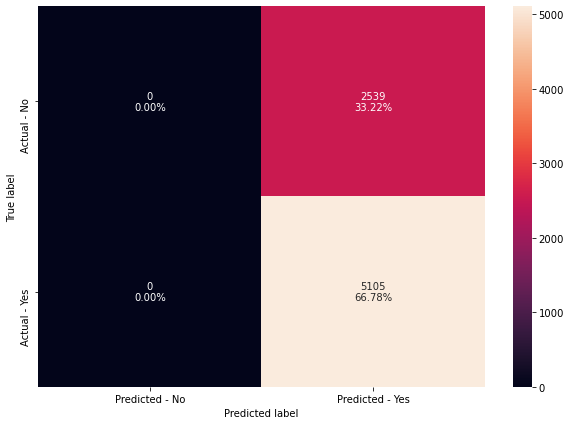

In [76]:
# visualize results
make_confusion_matrix(DecisionTree_tuned,y_test)

##### Insights:
Surprisingly, when going against the test data the best Decision tree quite short in depth. It perfectly fit the recall metric resulting in perfect recall scores but very subpar precision and recall scores

### Tuning: Bagging Classifer

In [44]:
# make a new classifier
bagging_estimator_tuned = BaggingClassifier(random_state=1) # using same random state to keep all things equal across models

# make a grid of parameters to tune on
parameters = {
    'max_samples': [0.7,0.8,0.9,1], # numer of samples to draw from X to train each tree
    'max_features': [0.7,0.8,0.9,1], # number of features to consider when looking for best split at each node
    'n_estimators': [10,25,50,75,100] # # number of trees in the forest
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score) # discussed earlier why recall is the best metric to use

# Run the grid search of the parameters
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring = acc_scorer, cv=5)

# fit search grid and bagging estimator on training data
grid_obj = grid_obj.fit(x_train, y_train)

# set the classifier to the best combo of parameters found in grid search
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the model with the best parameters to the data
bagging_estimator_tuned.fit(x_train, y_train)

BaggingClassifier(max_features=0.7, max_samples=1, random_state=1)

In [45]:
# let's see how the model performed
bagging_estimator_tuned_score = get_metrics_score(bagging_estimator_tuned)

Accuracy on training set :  0.6679188158779995
Accuracy on test set :  0.6678440607012036
Recall on training set :  1.0
Recall on test set :  1.0
Precision on training set :  0.6679188158779995
Precision on test set :  0.6678440607012036


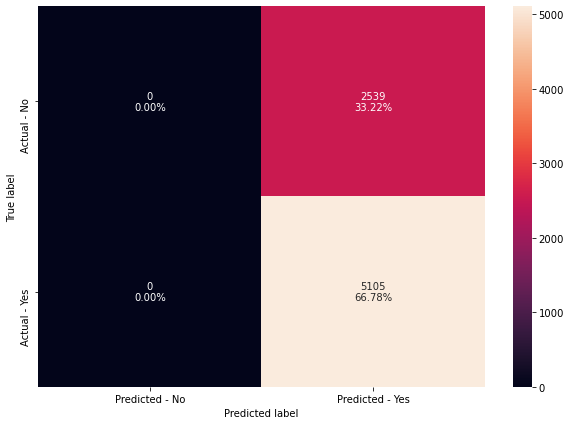

In [46]:
# visualize results
make_confusion_matrix(bagging_estimator_tuned, y_test)

##### Insights:
- The results are very confusing here. While we had perfect recall, we sacrificed scores in other areas. While we deem one score the best to measure our success, we also have to look at other scores to get a picture of how the model is performing as a whole.

### Tuning: Random Forest

In [47]:
# define new classifer
rf_estimator_tuned = RandomForestClassifier(random_state=1) # keeping the random_state consistent across all models

# Grid Search of Parameters for model
parameters = {
        'n_estimators': [50,100,150,200,250], # # number of trees in the forest
        'min_samples_leaf': np.arange(25,50,5), # min samples for a new leaf node to occuer
        'max_features': np.arange(0.2,0.7,0.1), # number of features to consider when looking for best split at each node
        'max_samples': np.arange(0.3,0.7,0.1) # # numer of samples to draw from X to train each tree
    }
    
# define most important score 
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the Grid Search
grid_obj = GridSearchCV(rf_estimator_tuned, parameters, scoring = acc_scorer, cv=5)
grid_obj = grid_obj.fit(x_train,y_train)

# Set classifier equal to best parameter combo
rf_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data
rf_estimator_tuned.fit(x_train,y_train)

RandomForestClassifier(max_features=0.2, max_samples=0.3, min_samples_leaf=45,
                       n_estimators=200, random_state=1)

In [48]:
# Let's see the scores of this new tuned random forest model
rf_estimator_tuned_score = get_metrics_score(rf_estimator_tuned)

Accuracy on training set :  0.7373289975330791
Accuracy on test set :  0.7220041862899006
Recall on training set :  0.9253756400570805
Recall on test set :  0.9202742409402547
Precision on training set :  0.743859649122807
Precision on test set :  0.7322319201995012


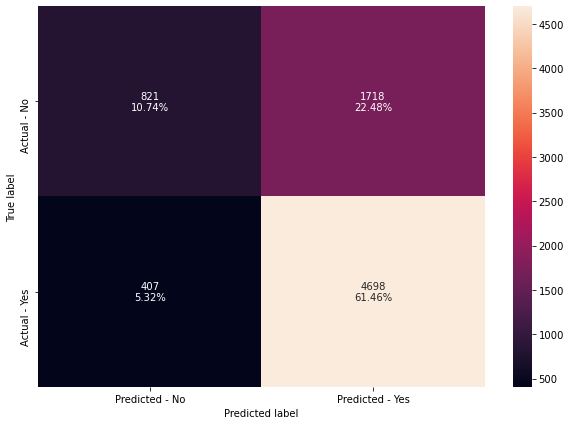

In [49]:
# visual the scores
make_confusion_matrix(rf_estimator_tuned, y_test)

##### Insights:
This random forest performed better on an overall scale than the bagging classifier in terms of being a more robust model. Although it performed worse in Recall, it performed better as a whole with accuracy and precision

### Tuning: Adapative Boosting

In [50]:
# define new classifier for tuning
abc_tuned = AdaBoostClassifier(random_state=1) # keep random state consistent across all models

# Grid Search of parameters
parameters = {
    'base_estimator': [DecisionTreeClassifier(max_depth=1, random_state=1), 
                       DecisionTreeClassifier(max_depth=2, random_state=1),
                       DecisionTreeClassifier(max_depth=3, random_state=1)], # trying different starting depths for base tree
    'n_estimators': np.arange(30,110,10), # how many trees to use
    'learning_rate': np.arange(0.1,2,0.1) 
}

# Type of scoring used to compare parameter combo results
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=acc_scorer, cv=5)
grid_obj.fit(x_train, y_train)

# Sethe the classifier to the best combo of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the new model parameters on the training data
abc_tuned.fit(x_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1,
                                                         random_state=1),
                   learning_rate=0.1, n_estimators=30, random_state=1)

In [51]:
# Lets see how the model performed on the metrics
abc_tuned_score = get_metrics_score(abc_tuned)

Accuracy on training set :  0.7045862300964342
Accuracy on test set :  0.6988487702773417
Recall on training set :  0.9619743137748678
Recall on test set :  0.9619980411361411
Precision on training set :  0.7041042025067584
Precision on test set :  0.6996723179940162


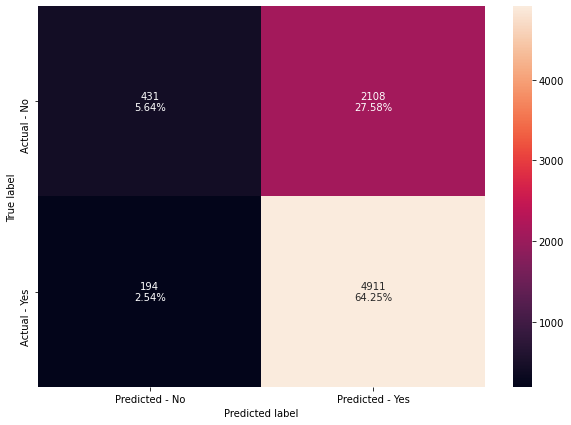

In [52]:
# visualize scores
make_confusion_matrix(abc_tuned, y_test)

##### Insights:
The adaptive boosting had a good effect on the recall score, raising it from to .96. But it also drug down the scores of the Precision and Accuracy

### Tuning: Gradient Boosting

In [53]:
# we will start by using an input of gradient boosting 
# this input uses another model as a starting point
# we will use AdaBoost for the initial predictions for the model to work on
gbc_init = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1), random_state=1)

# fit model on training data
gbc_init.fit(x_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           random_state=1)

In [54]:
# lets see how this model performed
gbc_init_score = get_metrics_score(gbc_init)

Accuracy on training set :  0.7552702399641175
Accuracy on test set :  0.7446363160648874
Recall on training set :  0.8797112398220431
Recall on test set :  0.8760039177277179
Precision on training set :  0.7813898001789442
Precision on test set :  0.772232774995683


##### Insights
This is a better base scoring to start off with than either just the gradient boosting or just the adapative boosting. We will use the adpative boosting as the initializer during our tuning

- Lets now tune the GBC_init model 

In [55]:
# make a new model to tune
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1), random_state=1)

# Make a grid of parameters to search through
parameters = {
    'n_estimators': [100,150,200,250],
    'subsample': [0.8,0.9,1],
    'max_features': [0.7,0.8,0.9,1]
}

# define the metric to score the parameter combos on
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the Grid Search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=acc_scorer, cv=5)
# fit grid on training data
grid_obj = grid_obj.fit(x_train,y_train)

# Set classifier to best combo of parameters found in grid search
gbc_tuned = grid_obj.best_estimator_

# Fit the model to the new best parameters found
gbc_tuned.fit(x_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=1, random_state=1, subsample=0.9)

In [56]:
# lets see how the model scored
gbc_tuned_score = get_metrics_score(gbc_tuned)

Accuracy on training set :  0.7346938775510204
Accuracy on test set :  0.7244897959183674
Recall on training set :  0.9204230672374717
Recall on test set :  0.9167482859941234
Precision on training set :  0.7434402332361516
Precision on test set :  0.735733375255463


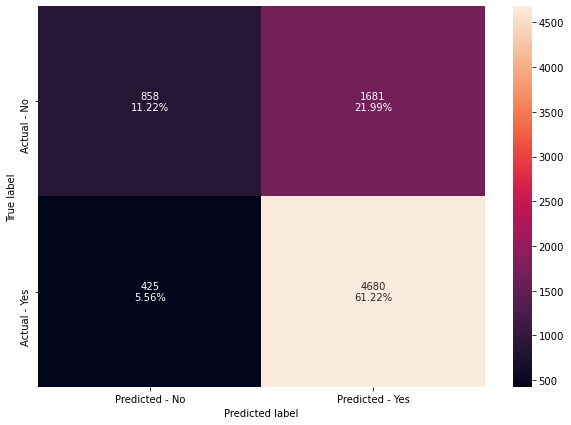

In [57]:
# visualize scores
make_confusion_matrix(gbc_tuned, y_test)

##### Insights:
from the gbc_init, the recall score improved by around 5% but at the cost of a slight drop in Precision and recall. We will have to see how this compares across all models

## Model Performance Comparison and Conclusions

In [78]:
# lets compile all the model scores and see how they compare
# defining list of models
models = [DecisionTree, DecisionTree_tuned, bagging_estimator, bagging_estimator_tuned, rf_estimator, rf_estimator_tuned, 
          abc, abc_tuned, gbc, gbc_init, gbc_tuned]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the accuracy, precall and precision scores
for model in models:
    j = get_metrics_score(model,False)
    acc_train.append(np.round(j[0],2))
    acc_test.append(np.round(j[1],2))
    recall_train.append(np.round(j[2],2))
    recall_test.append(np.round(j[3],2))
    precision_train.append(np.round(j[4],2))
    precision_test.append(np.round(j[5],2))

In [79]:
# lets now build the dataframe that we can print to show the results of all models
comparison_frame = pd.DataFrame({'Model':['DecisionTree','DecisionTree_tuned','Bagging Estimator with default Parameters','Bagging Estimator Tuned',
                                          'Random Forest with default parameters','Random Forest Tuned','AdaBoost with default paramters','AdaBoost Tuned', 
                                          'Gradient Boosting with default parameters','Gradient Boosting with init=AdaBoost',
                                          'Gradient Boosting Tuned'], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test}) 
comparison_frame #shows new dataframe

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision
0,DecisionTree,1.00,0.66,1.00,0.74,1.00,0.75
1,DecisionTree_tuned,0.67,0.67,1.00,1.00,0.67,0.67
2,Bagging Estimator with default Parameters,0.98,0.69,0.98,0.76,0.99,0.77
3,Bagging Estimator Tuned,0.67,0.67,1.00,1.00,0.67,0.67
4,Random Forest with default parameters,1.00,0.70,1.00,0.80,1.00,0.76
5,Random Forest Tuned,0.74,0.72,0.93,0.92,0.74,0.73
6,AdaBoost with default paramters,0.74,0.73,0.89,0.89,0.76,0.76
7,AdaBoost Tuned,0.70,0.70,0.96,0.96,0.70,0.70
8,Gradient Boosting with default parameters,0.76,0.75,0.88,0.88,0.78,0.77
9,Gradient Boosting with init=AdaBoost,0.76,0.74,0.88,0.88,0.78,0.77


After looking at the model scores side by side both tuned and untuned, I am inclined to say that the Gradient Boosting tuned model is the best performing overall in all metrics, with an emphasis on recall score. 

Let's now look at the importance of each of the variables in the Gradient Boosting tuned model to see what a profile of a certified visa case status

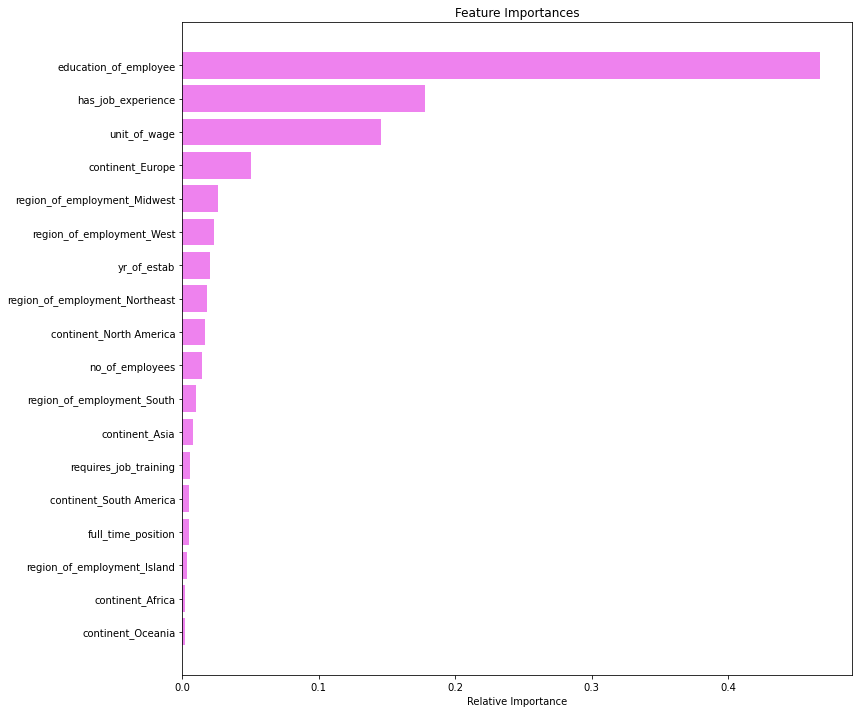

In [81]:
# lets build a bar chart of the level importance of the independent variables in the gradient boosting model
importances = gbc_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(x.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Actionable Insights and Recommendations

- Looking back at the dictionary definitions I defined for unit of wage, education of the employee and has job experience, they were all scaled values from their categorical origins. The scaling up was done naturally based on the increasing value of each of the possible values in the category.

- Based on those dicitionary definitions and the level of importance showing here in the bar chart above, that there are three things that clearly make a good profile for a certified case.

1) A high score on education of employee. This would equate to a bachelor/masters/PHD degree from the employee seeking a visa. Having a college degree would be a good indicator, especially a graduate level degree, of a good application

2) A score of 1 on has_job_experience, which relates to having job experience for the job being applied for on the visa application, is the second most important feature of a visa application.

3) A higher unit of wage score, which correlates to monthly pay or yearly based pay, seems to be the third best indicator of a good visa application. This is tied to average wages of positions that are similar to that of the position the employee is applying to. A higher score here seems to be a good indicator of a good application. The higher score correlates to monthly based pay or yearly based pay for similar positions. 

In conclusion, those top 3 features are of much higher of level of importance than any other feature. They are on a tier of their own in terms of importance on the applications. For that reason, I would suggest a fast tracking process be setup for applications that meet these higher standards. These applications could be initially sorted with those 3 variables prioritized. If they meet the standards of the top 3 variables, the application could be sent on a fast track for approval. Those who did not meet the initial standards could be sent through the regular process for more rigorous screening of the application. This should help alleviate the issue of more and more applications coming in and speed up processing times for likely approved applicants.